Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
# Import necessary libraries
library(tidymodels)
library(tidyverse)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching core tidyverse packages ──────────────────

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv("diabetes.csv") |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
# Examine training data
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 4, 3, 8, 13, 5, 3, 6, 10, 4, 11, 3, 7, …
$ Glucose                  <dbl> 89, 116, 110, 126, 99, 145, 117, 88, 92, 122,…
$ BloodPressure            <dbl> 66, 74, 92, 88, 84, 82, 92, 58, 92, 78, 60, 7…
$ SkinThickness            <dbl> 23, 0, 0, 41, 0, 19, 0, 11, 0, 31, 33, 0, 25,…
$ Insulin                  <dbl> 94, 0, 0, 235, 0, 110, 0, 54, 0, 0, 192, 0, 7…
$ BMI                      <dbl> 28.1, 25.6, 37.6, 39.3, 35.4, 22.2, 34.1, 24.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.191, 0.704, 0.388, 0.245, 0.3…
$ Age                      <dbl> 21, 30, 30, 27, 50, 57, 38, 22, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable `Outcome` is suitable as the "outcome" in a logistic regression model.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

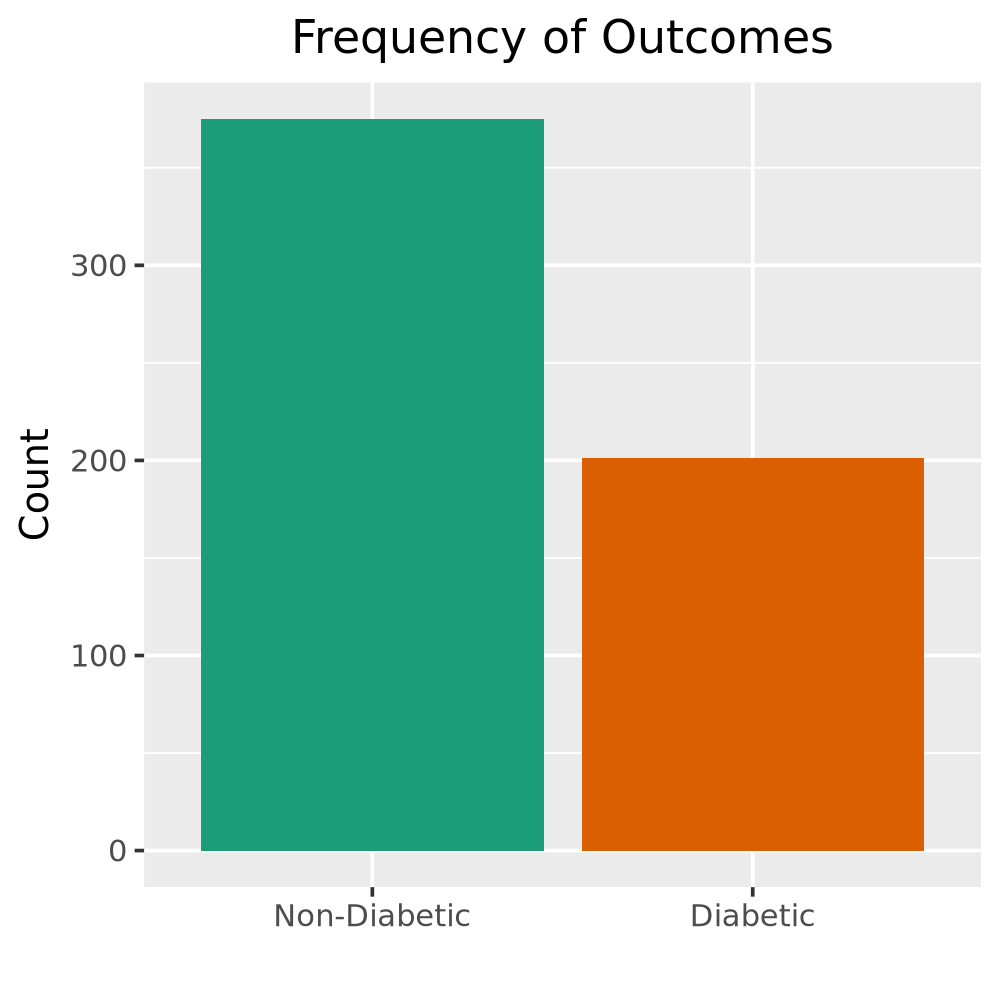

In [4]:
# Set width/height
options(repr.plot.width=4, repr.plot.height=4)

# Plot outcome variable with bar chart with corresponding labels and Dark2 palette
ggplot(data=diabetes_train, aes(x=Outcome, fill=Outcome)) +
  geom_bar() +
  labs(title ="Frequency of Outcomes",
       x="", # x-axis is self-explanatory
       y="Count") +
  scale_fill_brewer(palette="Dark2") +
  scale_x_discrete(labels=c("Non-Diabetic", "Diabetic")) +
  theme(legend.position="none", # No legend
        plot.title = element_text(hjust = 0.5)) # Center title

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [5]:
# Counts and proportions of Outcome values
table(diabetes_train$Outcome)
prop.table(table(diabetes_train$Outcome))


  0   1 
375 201 


        0         1 
0.6510417 0.3489583 

From the bar graph of the `Outcome` variable above as well as the table for the `Outcome` variable, the counts of each outcome are not equal and the data is not balanced. Around 65% of the outcomes are non-diabetic and the rest are diabetic.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

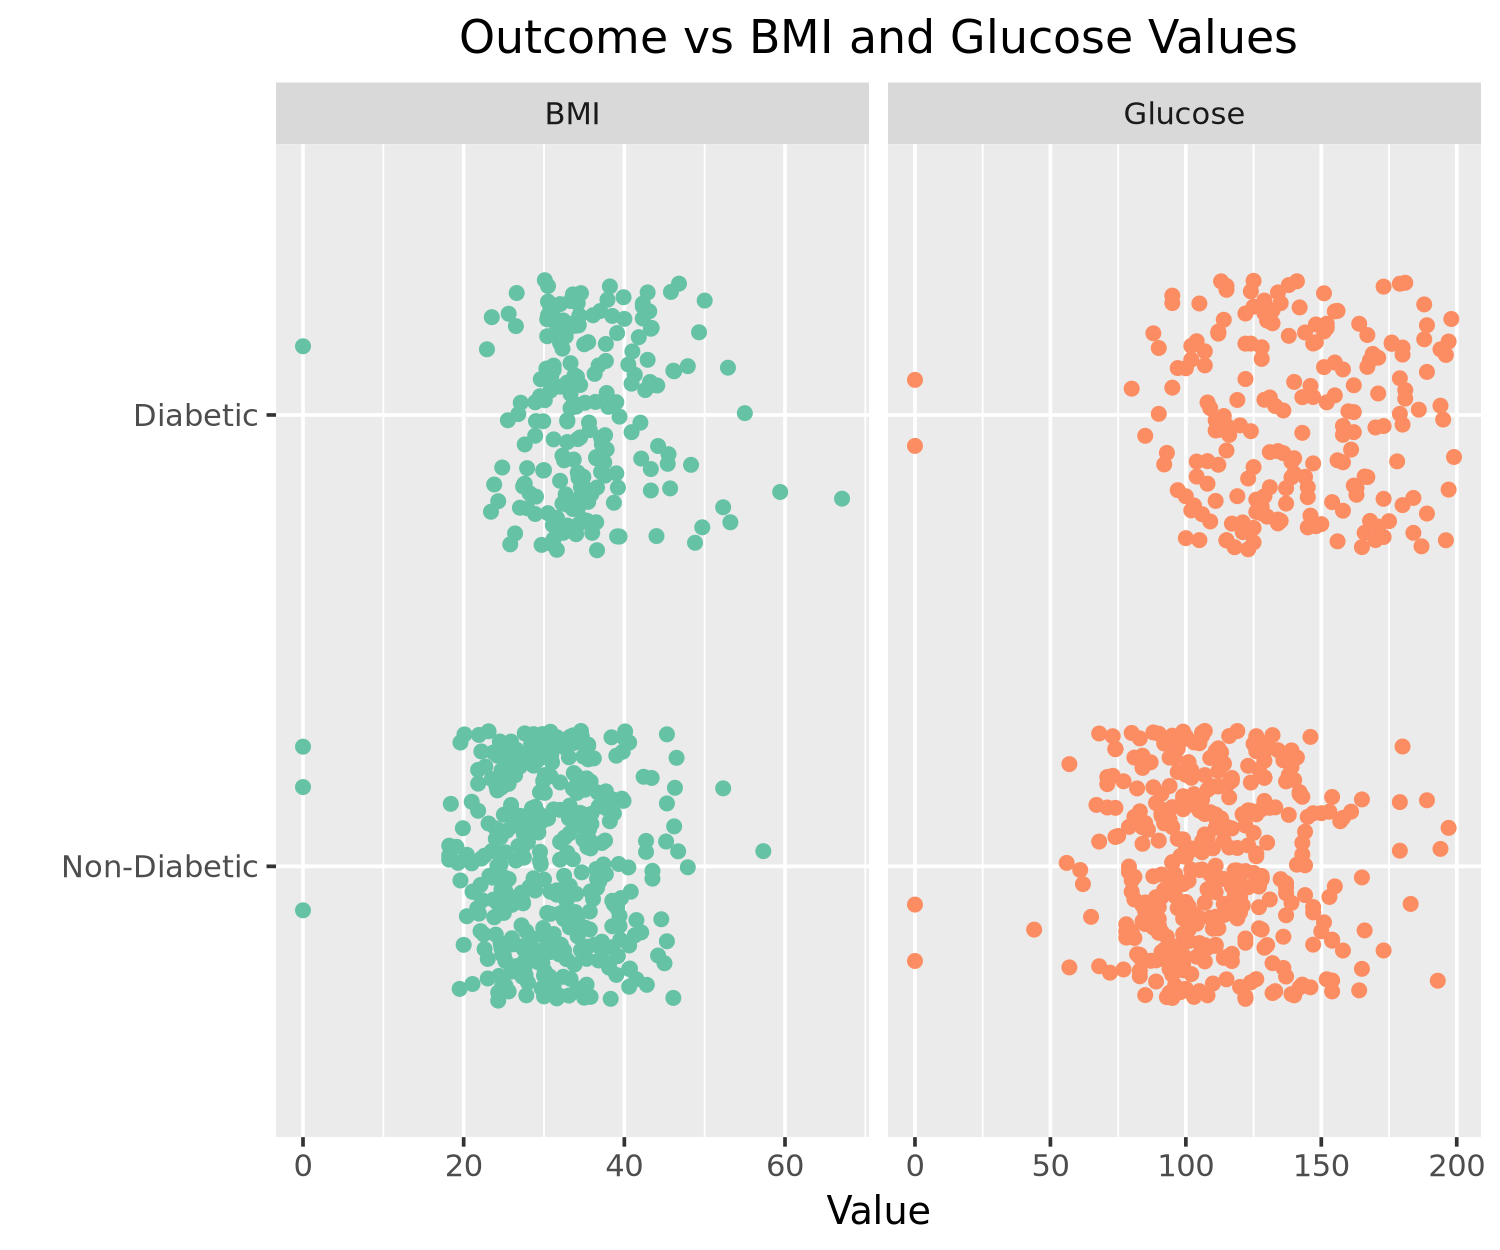

In [7]:
# Set width/height
options(repr.plot.width=6, repr.plot.height=5)

# Plot Outcome vs Value of BMI and Glucose using corresponding labels and Set2 colors
ggplot(data=plot_df, aes(y=Outcome, x=value, color=name)) +
  geom_jitter(width=0, height=0.3) +
  labs(title ="Outcome vs BMI and Glucose Values",
       x="Value",
       y="") + # y-axis is self-explanatory
  facet_wrap(~name, ncol=2, scales="free_x") +
  scale_color_brewer(palette="Set2") +
  scale_y_discrete(labels=c("Non-Diabetic", "Diabetic")) +
  theme(legend.position="none", # No legend
  plot.title = element_text(hjust = 0.5)) # Center title

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

If `scales="free_x"` argument is removed from the `facet_wrap` function, then the x-axis scale is locked across all facets. In the case of the plot above, this would lead to the BMI facet to look significantly more congested since its range of value is much lower than the values of Glucose.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
# Create model
mod = logistic_reg() |>
    set_engine("glm")

# Fit model
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data=diabetes_train)

# Examine model
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-6.97487286,0.668076797,-10.440226,1.624233e-25
BMI,0.07302061,0.015075209,4.843754,1.274086e-06
Glucose,0.03157485,0.003640379,8.673507,4.190125e-18


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
# Create dataset with predictions using the test dataset
diabetes_test_wPred = augment(mod_fit, new_data=diabetes_test)

# Examine dataset
glimpse(diabetes_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, …
$ .pred_0                  <dbl> 0.9128278, 0.3764355, 0.9045120, 0.6826847, 0…
$ .pred_1                  <dbl> 0.08717217, 0.62356448, 0.09548796, 0.3173152…
$ Pregnancies              <dbl> 1, 8, 3, 10, 8, 10, 10, 7, 1, 7, 1, 5, 7, 7, …
$ Glucose                  <dbl> 85, 183, 78, 115, 125, 168, 139, 100, 103, 19…
$ BloodPressure            <dbl> 66, 64, 50, 0, 96, 74, 80, 0, 30, 90, 66, 75,…
$ SkinThickness            <dbl> 29, 0, 32, 0, 0, 0, 0, 0, 38, 0, 15, 26, 0, 0…
$ Insulin                  <dbl> 0, 0, 88, 0, 0, 0, 0, 0, 83, 0, 140, 0, 0, 0,…
$ BMI                      <dbl> 26.6, 23.3, 31.0, 35.3, 0.0, 38.0, 27.1, 30.0…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.672, 0.248, 0.134, 0.232, 0.537, 1.4…
$ Age                      <dbl> 31, 32, 26, 29, 54, 34, 57, 32, 33, 41, 22, 6…
$ Outcome                  <fct> 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 117  30
         1   8  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

67 individuals had diabetes in the test data. Of these individuals, 32 were correctly predicted to have diabetes by my model. 35 individuals were predicted to have diabetes by my model that did not, in fact, have diabetes.